# General Profiling

This notebook serves as a visualization tool for general profiling (exploratory data analysis) of the Bills data. It provides key summary statistics, count distributions and plots, frequency distributions and plots, and cross-tabulation to understand the distribution of attributes within the dataset. 

These functions are to be run on data gathered using the 01_get_compiled_subjects_dataframe.py from the 02_gathering directory. It is expected that the data is to be in the form of a Pandas Dataframe with the following attributes:
- congress
- billNumber
- billType
- legislativeSubjects
- policyArea

#### Techniques used:
- Descriptive Statistics: bar charts, counts, unique values, and proportions for categorical values.
- Frequency Distributions: bar charts showing the most and least common number of an attribute (legislativeSubjects)
- Cross-tabulation: pairwise analysis of attributes

In [1]:
import pandas as pd 
from utils.general import (
    count_bar_plot,
    calculate_count_distribution,
    frequency_bar_plot,
    calculate_frequency_distribution,
    cross_tabulation_heatmap,
)

%matplotlib inline

In [3]:
data = pd.read_csv("../../local_data/01_bills/generated_data/concat_compiled_subjects_with_text.csv.gz", 
                 compression="gzip",
                 converters={
                     "congress": str,
                     "legislativeSubjects": pd.eval
                     })

In [4]:
data.head()

,congress,billType,billNumber,legislativeSubjects,policyArea,billText
0,101,hconres,1,"[American economic assistance, American milita...",International Affairs,<pre>Â \nB37 6-6-89 [OC's]\nHCON 1 IH\n101st C...
1,101,hconres,10,"[Constitutional law, Meditation, Prayer in the...","Civil Rights and Liberties, Minority Issues",<pre>Â \nB37 Rosey 1/4/89 [Updated]\nHCON 10 I...
2,101,hconres,100,"[Genocide, Human rights, International relief,...",International Affairs,<pre>Â \nHCON 100 IH\n101st CONGRESS\n1st Sess...
3,101,hconres,101,"[AIDS (Disease), Drug abuse, Equipment and sup...",Health,<pre>Â \nHCON 101 IH\n101st CONGRESS\n1st Sess...
4,101,hconres,102,"[Hurricanes, Meteorology, Military aircraft, W...","Science, Technology, Communications",<pre>Â \nB37 4-25-89 [update]\nHCON 102 IH\n10...


In [5]:
data

,congress,billType,billNumber,legislativeSubjects,policyArea,billText
0,101,hconres,1,"[American economic assistance, American milita...",International Affairs,<pre>Â \nB37 6-6-89 [OC's]\nHCON 1 IH\n101st C...
1,101,hconres,10,"[Constitutional law, Meditation, Prayer in the...","Civil Rights and Liberties, Minority Issues",<pre>Â \nB37 Rosey 1/4/89 [Updated]\nHCON 10 I...
2,101,hconres,100,"[Genocide, Human rights, International relief,...",International Affairs,<pre>Â \nHCON 100 IH\n101st CONGRESS\n1st Sess...
3,101,hconres,101,"[AIDS (Disease), Drug abuse, Equipment and sup...",Health,<pre>Â \nHCON 101 IH\n101st CONGRESS\n1st Sess...
4,101,hconres,102,"[Hurricanes, Meteorology, Military aircraft, W...","Science, Technology, Communications",<pre>Â \nB37 4-25-89 [update]\nHCON 102 IH\n10...
...,...,...,...,...,...,...
220008,118,sres,95,[],International Affairs,<html><body><pre>\n[Congressional Bills 118th ...
220009,118,sres,96,[],Commerce,<html><body><pre>\n[Congressional Bills 118th ...
220010,118,sres,97,[],International Affairs,<html><body><pre>\n[Congressional Bills 118th ...
220011,118,sres,98,"[Aviation and airports, Commemorative events a...",Transportation and Public Works,<html><body><pre>\n[Congressional Bills 118th ...


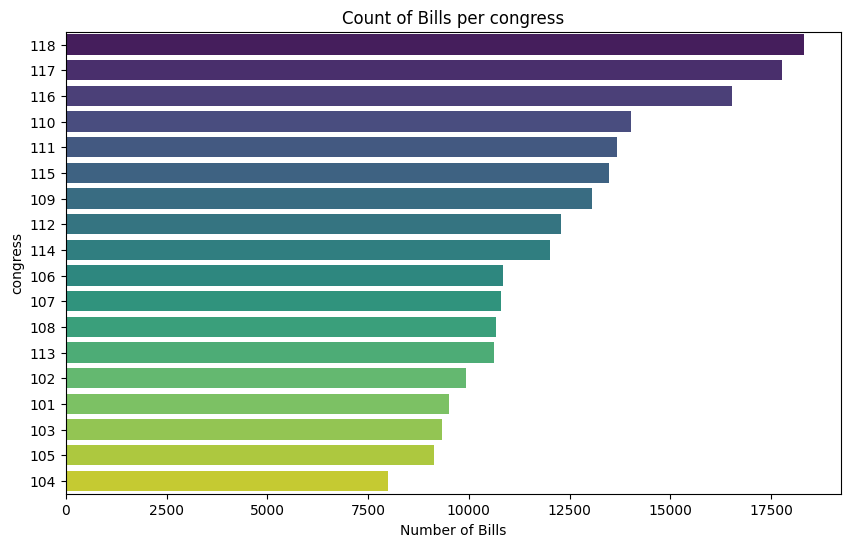

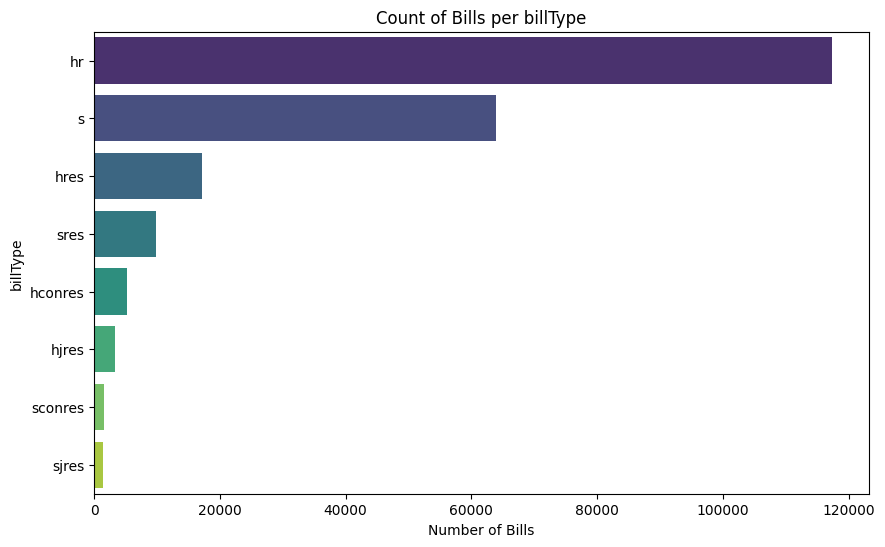

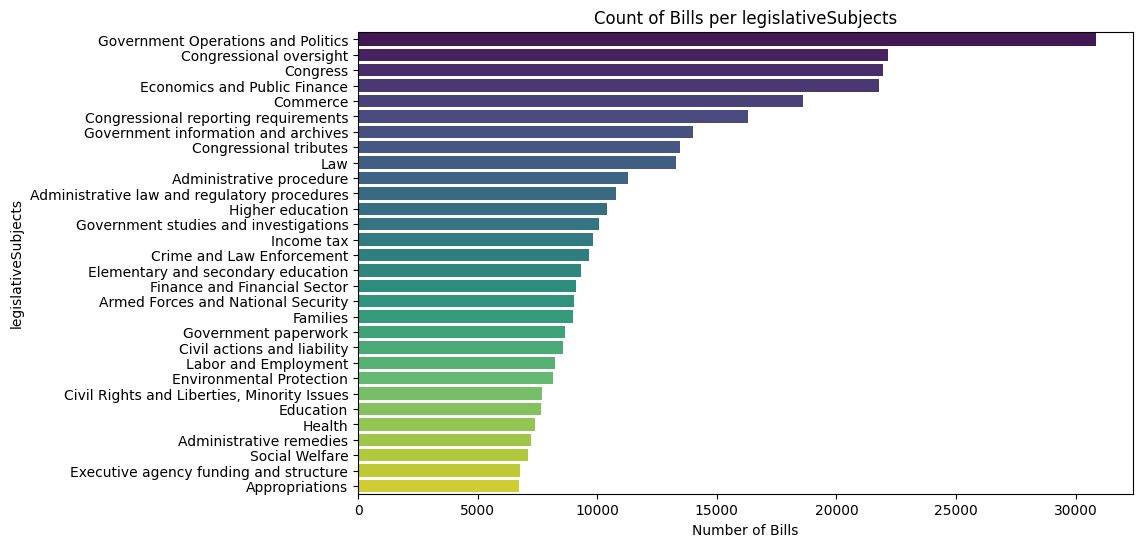

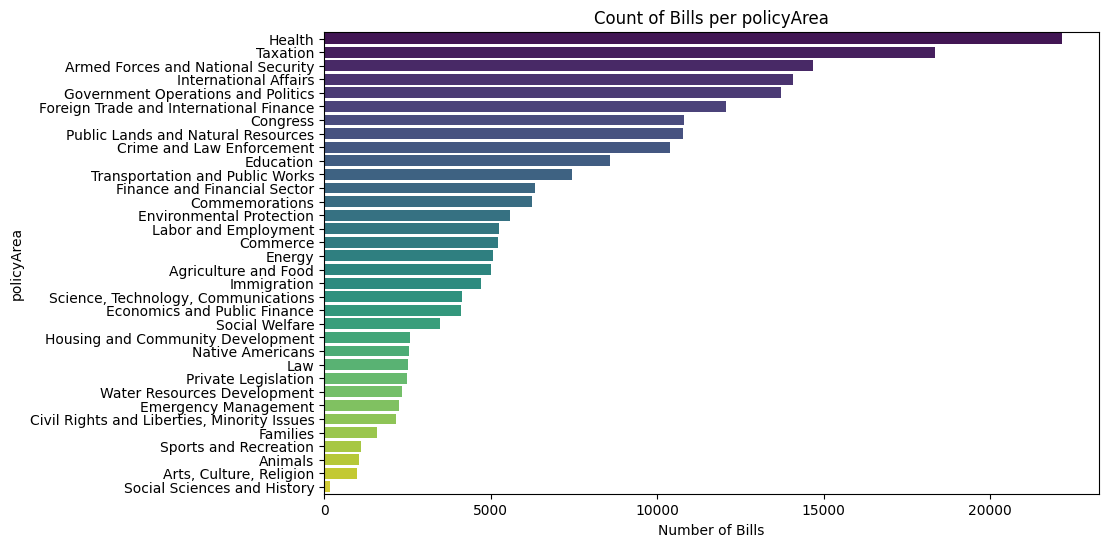

In [6]:
count_bar_plot(data, "congress")
count_bar_plot(data, "billType")
count_bar_plot(data, "legislativeSubjects", n=30)
count_bar_plot(data, "policyArea")

In [7]:
calculate_count_distribution(data, "congress")

Summary Stats for congress:
count     220013
unique        18
top          118
freq       18320
Name: congress, dtype: object



In [8]:
calculate_count_distribution(data, "billType")

Summary Stats for billType:
count     220013
unique         8
top           hr
freq      117363
Name: billType, dtype: object



In [9]:
calculate_count_distribution(data, "legislativeSubjects", n=5)

Summary Stats for legislativeSubjects:
count                                1840536
unique                                  6210
top       Government Operations and Politics
freq                                   30855
Name: legislativeSubjects, dtype: object

Top 5 Most Frequent: legislativeSubjects
Government Operations and Politics    30855
Congressional oversight               22173
Congress                              21962
Economics and Public Finance          21776
Commerce                              18613
Name: count, dtype: int64



In [10]:
calculate_count_distribution(data, "policyArea", n=5)

Summary Stats for policyArea:
count     220013
unique        34
top       Health
freq       22154
Name: policyArea, dtype: object

Top 5 Most Frequent: policyArea
Health                                22154
Taxation                              18324
Armed Forces and National Security    14683
International Affairs                 14071
Government Operations and Politics    13713
Name: count, dtype: int64



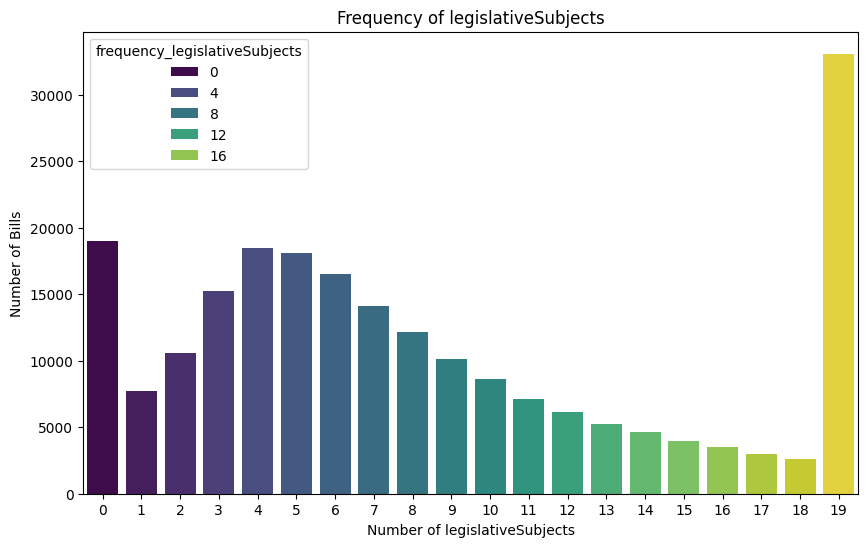

In [11]:
frequency_bar_plot(data, "legislativeSubjects")

In [12]:
calculate_frequency_distribution(data, "legislativeSubjects")

Summary Stats for Counts for legislativeSubjects:
count     6210.000000
mean       296.382609
std       1064.968998
min          1.000000
25%         11.000000
50%         48.000000
75%        197.000000
max      30855.000000
Name: count, dtype: float64



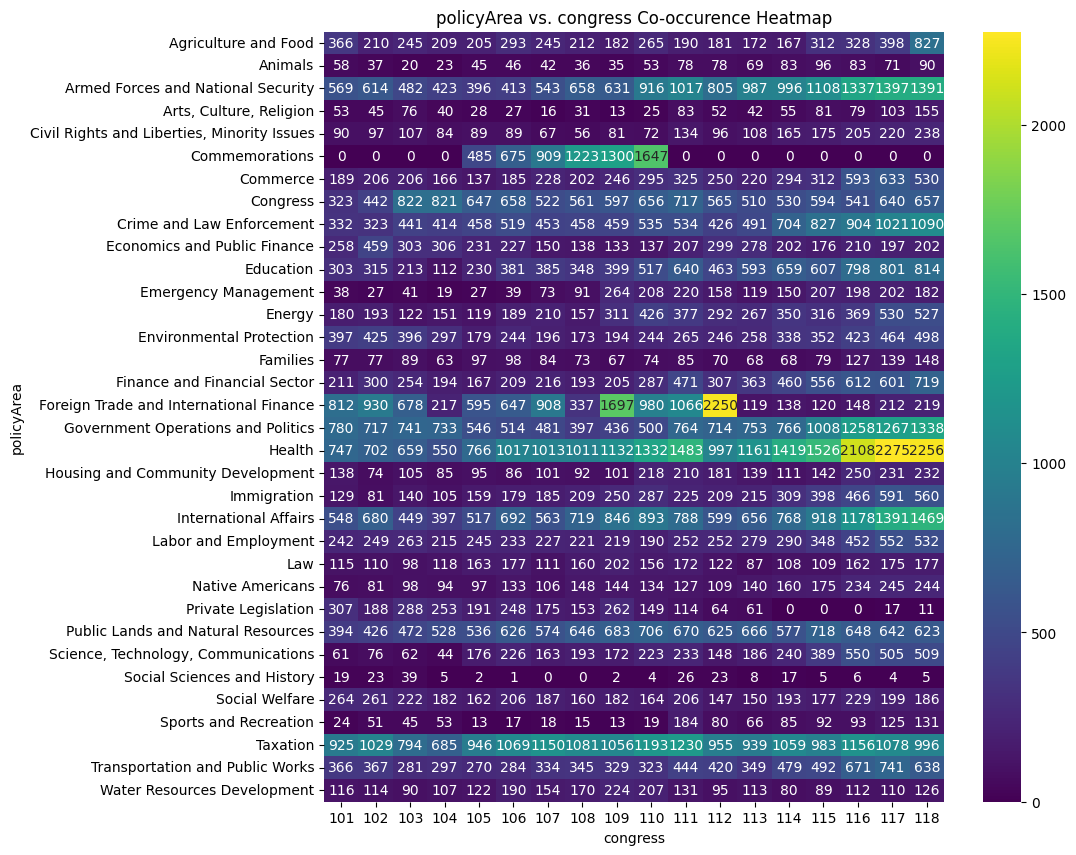

In [13]:
cross_tabulation_heatmap(data, ["policyArea", "congress"])

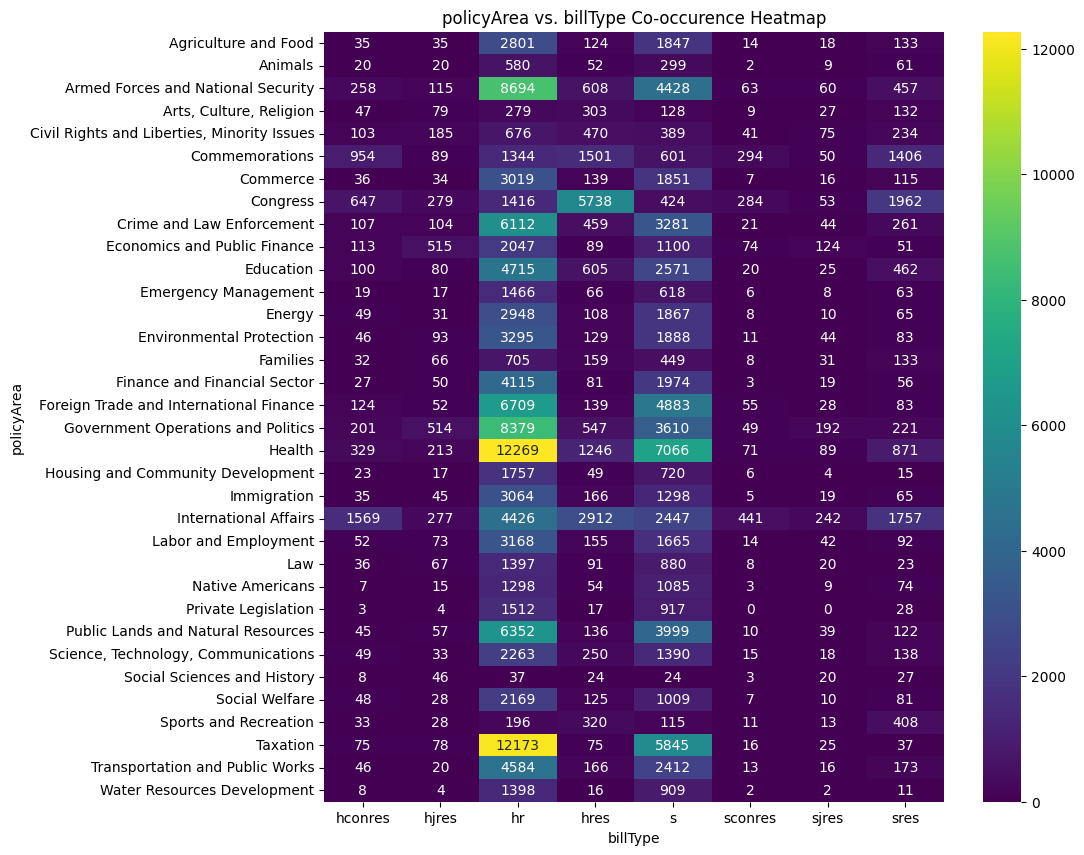

In [14]:
cross_tabulation_heatmap(data, ["policyArea", "billType"])

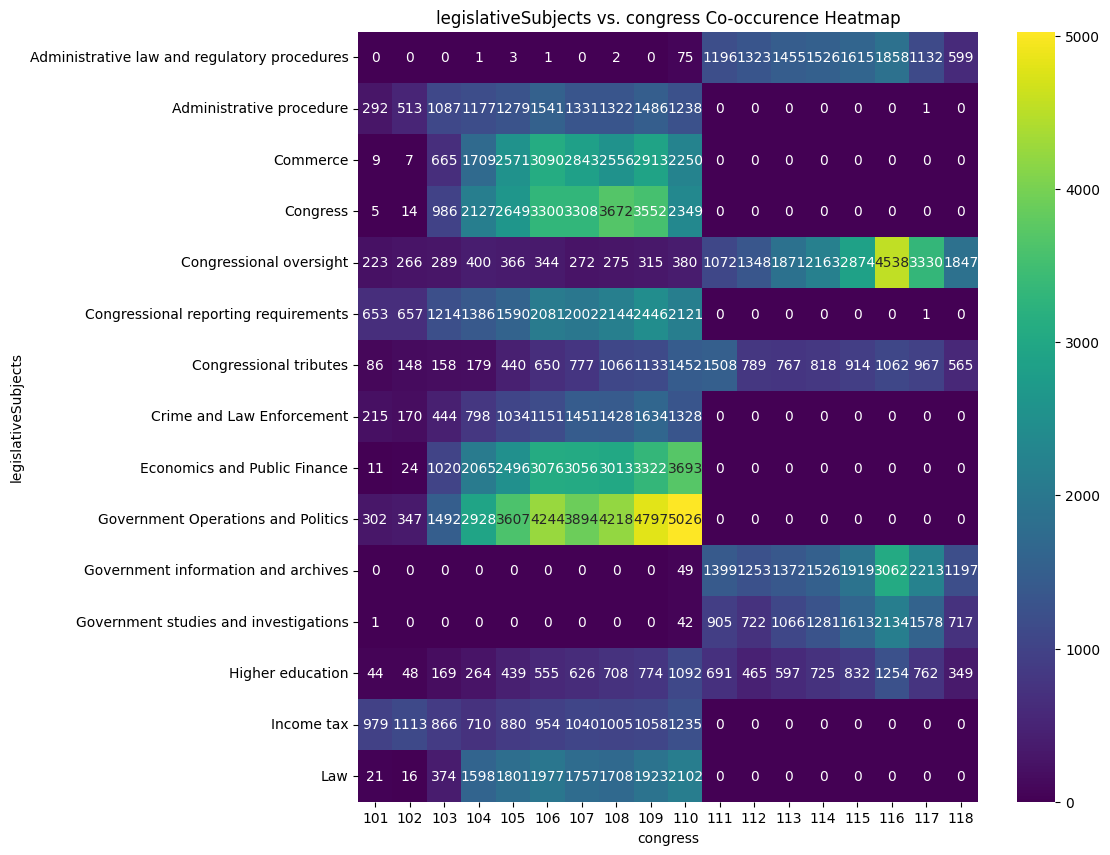

In [15]:
cross_tabulation_heatmap(data, ["legislativeSubjects", "congress"], n1=15, n2=19)

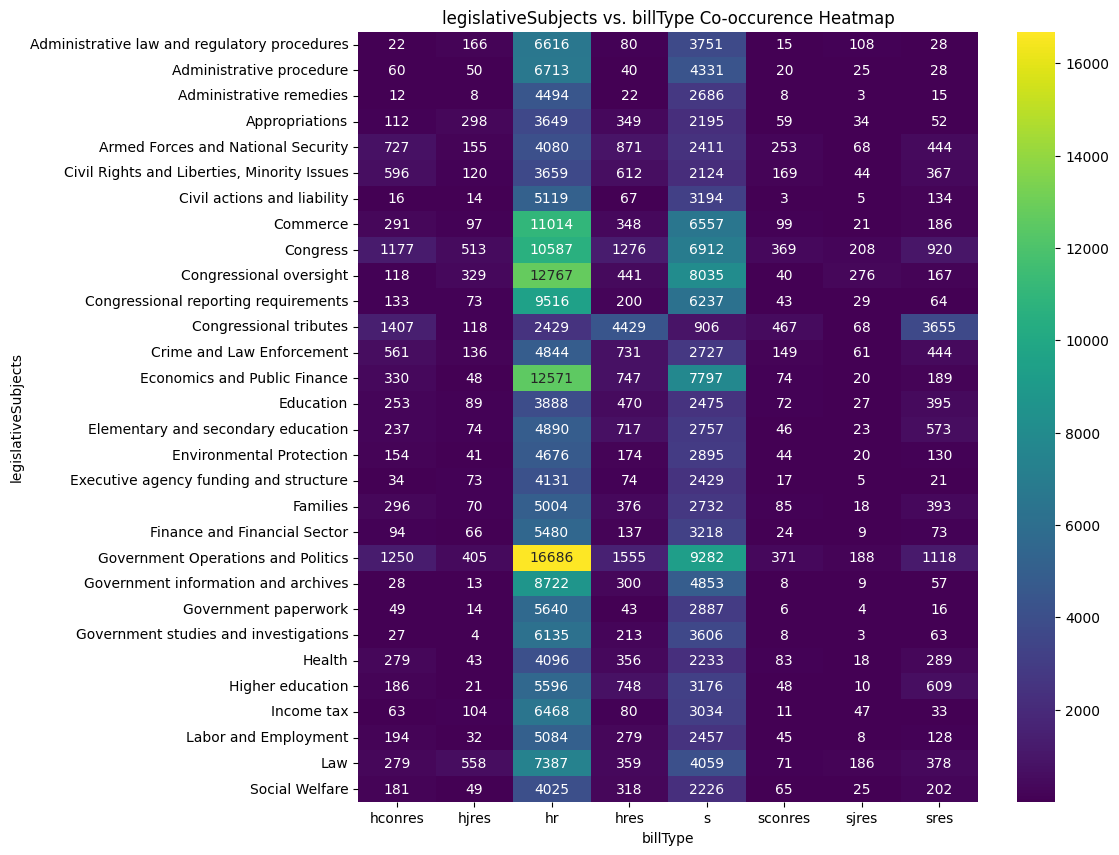

In [16]:
cross_tabulation_heatmap(data, ["legislativeSubjects", "billType"], n1=30)

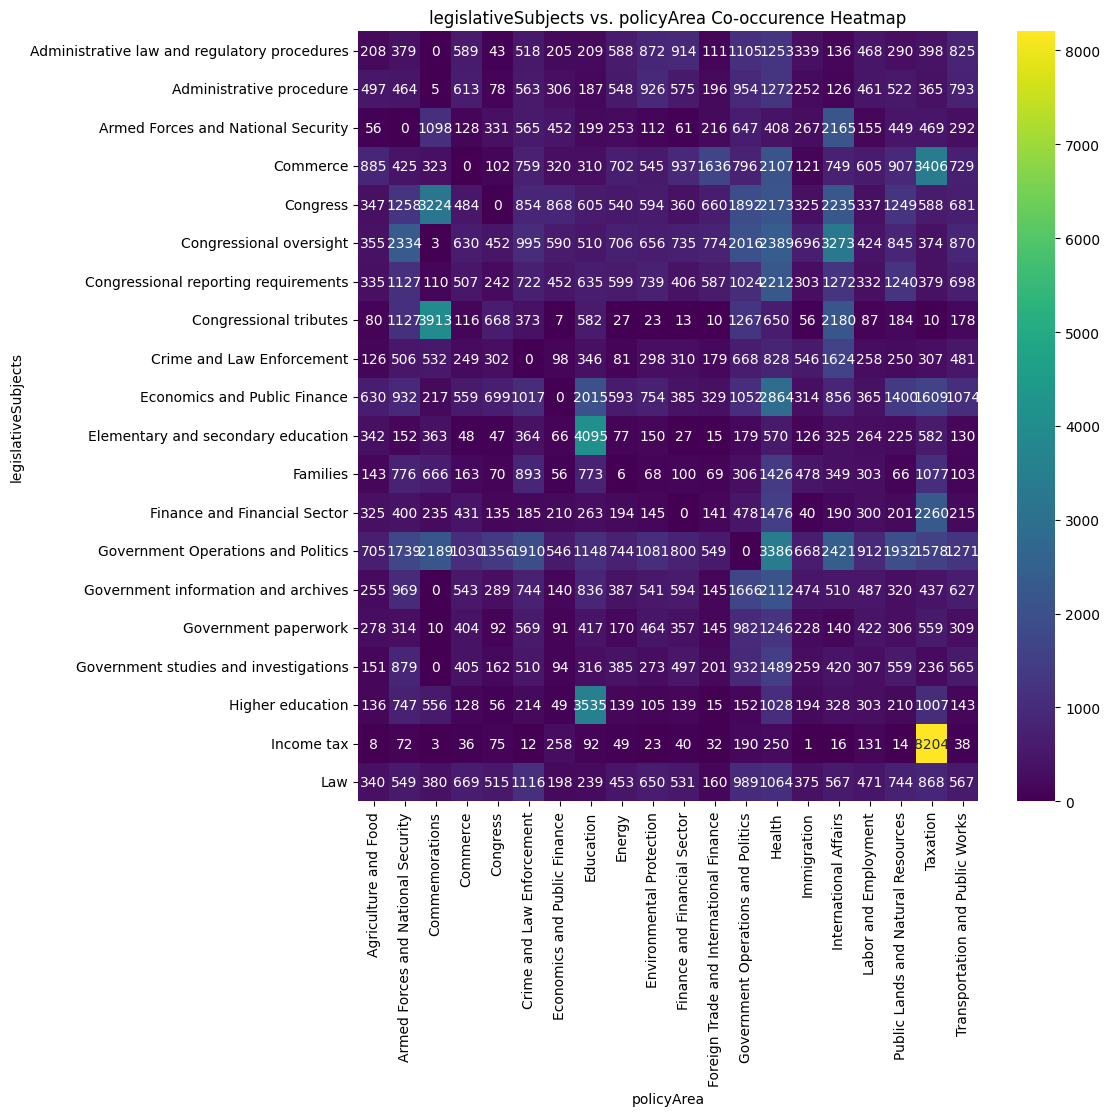

In [17]:
cross_tabulation_heatmap(data, ["legislativeSubjects", "policyArea"], n1=20, n2=20)